# What Differs the Android Open Source Project from Other Linux Distributions

The **Android Open Source Project (AOSP)** is a Linux-based operating system designed primarily for mobile devices like smartphones, tablets, and other embedded systems. However, while it is built upon the Linux kernel, there are several key differences between AOSP and other Linux distributions (like Ubuntu, Fedora, or Debian). Here are some of the primary distinctions:


## 1. Purpose and Target Devices
- **AOSP**: Android is designed primarily for mobile and embedded devices. Its focus is on optimizing the system for touchscreen interfaces, mobile hardware (like ARM processors), and battery efficiency.
- **Other Linux Distributions**: Most other distributions are designed for a wide range of devices, including servers, desktops, laptops, and embedded systems, but not necessarily optimized for mobile hardware and touchscreen interfaces.

## 2. Graphical User Interface (GUI)
- **AOSP**: Android provides a custom GUI tailored for mobile devices. It uses its own set of UI components, which are based on Java and Kotlin through Android’s framework. The GUI is optimized for touch-based interactions.
- **Other Linux Distributions**: Most other distributions, such as Ubuntu or Fedora, use desktop environments like GNOME, KDE, or Xfce, which are designed for keyboard and mouse interactions. These distributions often use GTK or Qt for building applications.

## 3. Package Management
- **AOSP**: AOSP does not use traditional package management systems like `apt`, `yum`, or `pacman` found in other Linux distributions. Instead, it uses a build system based on the `repo` tool, which integrates with Git to download and build the source code.
- **Other Linux Distributions**: Other distributions rely on package managers like `apt` (Debian/Ubuntu), `dnf` (Fedora), or `pacman` (Arch Linux) to handle software installation, updates, and dependency management.

## 4. Core Components
- **AOSP**: Android uses a modified version of the Linux kernel, but the user space is quite different from traditional Linux distributions. For example, it includes the **Zygote** process (which helps in starting apps) and a Java-based runtime called **ART** (Android Runtime) instead of GNU libraries. The AOSP does not have many typical GNU utilities found in other Linux systems.
- **Other Linux Distributions**: Most distributions include the full range of GNU tools, libraries, and services, such as the **GNU C Library** (glibc), and many other system utilities. Additionally, typical Linux distributions follow the Filesystem Hierarchy Standard (FHS), which is different from Android’s layout.

## 5. Security Model
- **AOSP**: Android uses a unique security model, including a permissions-based system that governs access to device features and data. It uses a user-based security model, where each app runs in its own isolated environment (sandboxed), and it relies on the **SELinux** security framework for enforcing access control policies.
- **Other Linux Distributions**: While other Linux distributions also support SELinux or AppArmor, they tend to follow a more traditional Linux user-permission model, where applications have more direct access to system resources. These distributions often have fewer restrictions on how applications interact with the system compared to Android.

## 6. Hardware Support
- **AOSP**: Android is tailored for mobile and embedded hardware, supporting a range of chips (mostly ARM-based). It also includes support for specific sensors and mobile components like GPS, accelerometers, touchscreens, and cameras.
- **Other Linux Distributions**: Most Linux distributions support a broader range of hardware, from servers to desktops and mobile devices. However, they may not offer the same level of integration with mobile-specific components like touchscreen interfaces and GPS.

## 7. Software and App Ecosystem
- **AOSP**: Android uses its own app ecosystem, where applications are generally packaged in `.apk` format and run inside the Android Runtime (ART) environment. The Google Play Store (for non-open-source variants of Android) provides the primary distribution platform for Android apps.
- **Other Linux Distributions**: Linux distributions rely on package managers (e.g., APT, RPM) for software installation, and applications are typically distributed in formats like `.deb`, `.rpm`, or flatpaks. These distributions often have software repositories that include desktop and server applications.

## 8. Customization and Control
- **AOSP**: AOSP is highly customizable, but the default installation is tightly controlled by Google (for the version that powers most commercial devices). Users can modify AOSP to create custom versions of Android, often used by manufacturers (e.g., Samsung, Xiaomi) or enthusiasts.
- **Other Linux Distributions**: Other distributions are often more flexible when it comes to customization. For instance, with distributions like Arch Linux, users have full control over the system and can build it from the ground up.

## 9. Updates and Patches
- **AOSP**: Updates for AOSP devices typically come from the device manufacturer or carrier (unless using the Google Nexus or Pixel devices, which are directly supported by Google). These updates may include security patches, bug fixes, or new features.
- **Other Linux Distributions**: Updates for other distributions are handled centrally by the distribution maintainers and are often more frequent and standardized. These distributions also have a robust security patching system in place.

## 10. System Resource Management
- **AOSP**: Android is optimized for mobile resource constraints, such as limited battery life and processing power. It includes various optimizations, like power management, background process limitations, and memory management, to improve the user experience on mobile devices.
- **Other Linux Distributions**: Other Linux distributions may not include as many optimizations for mobile devices and may instead be optimized for larger hardware (e.g., servers and desktops) with more resources available.

## Conclusion:
The **Android Open Source Project** is a unique variant of Linux tailored specifically for mobile and embedded devices, with a strong focus on optimizing the user experience for touch interfaces, resource-constrained devices, and a mobile-specific security model. In contrast, other Linux distributions cater to a broader range of devices, supporting desktop environments, server use, and general-purpose software ecosystems.


# What Differs Android from Other Linux-Based Systems?

This article provides an introduction to embedded Android from the perspective of an embedded Linux developer.

If you are an embedded Linux developer who has never worked with embedded Android, this article is for you. If you develop or maintain Linux distros and want to start developing Android distros, this article is also for you. Similarly, if you are an Android application developer who wants to understand a bit of how Android works internally, this article is for you. And if you are simply curious, this article is for you as well! 🙂

We will compare a GNU/Linux system with Android from various perspectives: the build system, partition layout, root filesystem contents, OS architecture, IPC/RPC mechanisms, and hardware access. Let’s dive in!

If you prefer a one-hour talk over reading this article, you can watch the talk “[What Differs the Android Open Source Project from Other Linux Distributions?](https://www.youtube.com/watch?v=QmlAtT4P0kM)” presented at the Embedded Linux Conference Europe 2020.

## High-Level Overview


![](https://sergioprado.blog/images/20210404-embedded-linux-arch.png)

---

![](https://sergioprado.blog/images/20210404-android-architecture.png)

### The Difference in a Nutshell

In any embedded Linux system, you will always find the same main components:

- One or more bootloader(s) to bootstrap, configure the hardware, and boot the Linux kernel.
- The Linux kernel itself.
- The root filesystem (rootfs), containing libraries and applications.

#### Embedded Linux Architecture

Now, if you look at the same diagram for an Android-based system, here’s how it differs:

- **Bootloader**: Android doesn’t require anything special, though it often includes support for `fastboot`, a protocol Google developed to interact with bootloaders.
- **Linux Kernel**: The kernel is present, but with some modifications. We'll discuss these changes shortly.
- **Root Filesystem**: This is where things get interesting—Android’s root filesystem is fundamentally different from typical Linux root filesystems like those from Debian or custom-built rootfs systems like Buildroot or OpenEmbedded.

#### Android Architecture

As illustrated below, Android's userspace components are clearly divided into three main layers:

![](https://sergioprado.blog/images/20210404-android-architecture.png)


1. **Native**: Contains native (C/C++) applications and libraries. These run outside the ART (Android Runtime) Virtual Machine and abstract the Linux kernel interfaces to the framework layer.
2. **Framework**: Implements all operating system services, mostly in Java. Access to resources is exposed via system services using an IPC/RPC mechanism called Binder. Applications access these services via APIs.
3. **Application**: Typically written in Java or Kotlin, these applications interact with the exposed operating system APIs.

### The Linux Kernel

To run an Android-based system, a few extra “features” must be enabled in the Linux kernel. Here are some of the key differences:

- **Binder**: This IPC (Inter-Process Communication) and RPC (Remote Procedure Call) mechanism is unique to Android. It is similar to DBUS but is kernel-based, providing faster and lighter communication.
- **Ashmem**: Android’s default shared memory allocator, different from POSIX SHM.
- **Low Memory Killer**: A logic built on top of the kernel’s Out-Of-Memory (OOM) killer, which, in conjunction with a daemon (lmkd), helps manage the system during low memory situations.

These features are often available in the mainline kernel, but for a complete list of "Androidisms," you can explore Google’s kernel-common repository:

```bash
git clone https://android.googlesource.com/kernel/common kernel-common
git checkout remotes/origin/android11-5.4
git log --oneline | grep "ANDROID:" | less
```

![](https://source.android.com/static/docs/core/architecture/images/common-kernel-branching.png)

# Android Open Source Project (AOSP)

The AOSP is a massive project consisting of hundreds of repositories (e.g., 780 repositories in Android 11). The project is managed using tools like `repo` and `git`, and is considerably large—Android 11’s source code alone is around 100GB.

Cloning the latest AOSP source code is simple:

```bash
repo init -u https://android.googlesource.com/platform/manifest
repo sync
```


1. Initialize repo with the AOSP manifest.
2. Sync the repositories.

After a few hours, you’ll have the entire Android source code on your machine.

```bash
$ ls
Android.bp      dalvik       libcore           read-snapshot.txt
art             developers   libnativehelper   sdk
bionic          development  Makefile          system
bootable        device       out               test
bootstrap.bash  external     packages          toolchain
build           frameworks   pdk               tools
compatibility   hardware     platform_testing
cts             kernel       prebuilts
```

Directory structure of AOSP:

- `Android.bp`  
- `dalvik`  
- `libcore`  
- `read-snapshot.txt`  
- `art`  
- `developers`  
- `libnativehelper`  
- `sdk`  
- `bionic`  
- `development`  
- `Makefile`  
- `system`  
- `bootable`  
- `device`  
- `out`  
- `test`  
- `bootstrap.bash`  
- `external`  
- `packages`  
- `toolchain`  
- `build`  
- `frameworks`  
- `pdk`  
- `tools`  
- `compatibility`  
- `hardware`  
- `platform_testing`  
- `cts`  
- `kernel`  
- `prebuilts`  

## Android Build System

In earlier versions of Android, the build system was based on Makefiles, using `Android.mk` files to define instructions for compiling components. However, this has since been replaced with the **Soong build system**, which uses **Blueprint** files (`Android.bp`), similar to JSON.

![](https://sergioprado.blog/images/20210404-android-build-system.png)

Here’s a simple example of a Blueprint file to build a "Hello World" C application in Android:

```json
cc_binary {
    name: "helloworld",
    srcs: ["helloworld.c"],
    tags: ["optional"],
}
```

Blueprint files are processed by a tool called **Blueprint**, which generates `.ninja` files for the **Ninja** build system to process.

The process for building Android involves just three commands:

```bash
source build/envsetup.sh
lunch aosp_x86_64-eng
make
```

1. Source the build environment setup script.
2. Set the build target.
3. Run `make` to generate the images.

After running these commands, the Android images are generated in the `out/target/product/` directory.

## Rootfs Organization and Partition Layout

Unlike typical Linux systems, Android’s root filesystem organization and partition layout are quite different. For example, directories like `/sbin`, `/usr`, and `/lib` are missing in Android.

![](https://sergioprado.blog/images/20210404-android-partition-layout.png)

The main directories in Android’s root filesystem are:

- `/system`: Contains the operating system components like applications and libraries.
- `/data`: Stores user data and runtime applications.
- `/cache`: Contains temporary data.
- `/vendor`: Holds files from the SoC manufacturer.
- `/odm`: Contains files specific to the device manufacturer.

## Android’s C Library: Bionic

Android uses a custom C library called **Bionic** instead of glibc, uclibc-ng, or musl, which are common in embedded Linux systems. Bionic is lightweight, simple, and released under the BSD license. However, it does not fully support POSIX, which can make building native Linux applications for Android more challenging.

## Why Doesn’t Android Use BusyBox?

Unlike many embedded Linux systems, Android does not use **BusyBox**. Instead, it uses **Toolbox** and **Toybox**, which provide similar functionalities for tools like the init program, shell, and utilities for system configuration. Toolbox was developed by Google, and Toybox was created by the community (by Rob Landley, former BusyBox maintainer).

This article covered a high-level overview of the major differences between embedded Linux and Android. These differences span the architecture, kernel modifications, the build system, root filesystem structure, and more. Understanding these aspects will provide you with a deeper understanding of how Android operates in comparison to other Linux-based systems.


# Android Init System

In essence, the `init` application is executed by the kernel right after mounting the `rootfs` and is responsible for system initialization and management.

Several implementations of the `init` process exist for Linux systems, including `sysvinit`, `systemd`, and `upstart`. However, Android has its own custom init system!

### Android Init Process Responsibilities
The Android `init` process has three primary responsibilities:
1. Initialize and configure the operating system execution environment (set environment variables, manage file and directory permissions, create links, mount file systems, set up SELinux, etc.).
2. Start and monitor daemons.
3. Manage system properties.

The behavior of the init process is controlled by a configuration file (`/etc/init/hw/init.rc` by default). This file differs significantly from the init configuration files typically used in other Linux systems. Below is a snippet from the default Android `init.rc` file:

```bash
import /init.environ.rc
import /system/etc/init/hw/init.usb.rc
import /init.${ro.hardware}.rc
import /vendor/etc/init/hw/init.${ro.hardware}.rc
import /system/etc/init/hw/init.usb.configfs.rc
import /system/etc/init/hw/init.${ro.zygote}.rc

# Cgroups are mounted right before early-init using list from /etc/cgroups.json
on early-init
    # Disable sysrq from keyboard
    write /proc/sys/kernel/sysrq 0

    # Disable kernel module autoloading, which causes SELinux denials
    write /proc/sys/kernel/modprobe \n

    ...

on init
    sysclktz 0

    # Mix device-specific information into the entropy pool
    copy /proc/cmdline /dev/urandom
    copy /system/etc/prop.default /dev/urandom

    symlink /proc/self/fd/0 /dev/stdin
    symlink /proc/self/fd/1 /dev/stdout
    symlink /proc/self/fd/2 /dev/stderr

    ...

# Mount filesystems and start core system services
on late-init
    trigger early-fs

    # Mount fstab in init.{$device}.rc by mount_all command. Optional parameter
    # '--early' can be specified to skip entries with 'latemount'.
    # /system and /vendor must be mounted by the end of the fs stage,
    # while /data is optional.
    trigger fs

on property:ro.debuggable=1
    # Enable write permissions for anyone to the trace folder on debug builds
    chmod 0773 /data/misc/trace
    # Enable read permissions for anyone to the window trace folder on debug builds
    chmod 0775 /data/misc/wmtrace

service ueventd /system/bin/ueventd
    class core
    critical
    seclabel u:r:ueventd:s0
    shutdown critical

service console /system/bin/sh
    class core
    console
    disabled
    user shell
    group shell log readproc
    seclabel u:r:shell:s0
    setenv HOSTNAME console

```

As you can see, Android’s init.rc file defines actions (e.g., on init) and services (e.g., service console /system/bin/sh). When a trigger occurs during boot (such as early-init), the corresponding commands are executed.

While there are numerous details here, we’ll focus on one crucial aspect of the init process: daemons.


# Android Daemons

Daemons are background processes responsible for managing specific system functionalities. Most of these are executed at startup by the init process and continue running as long as the system is functional.

Daemons generally centralize access to system resources. In Android, many daemons act as an interface between the Android framework (Java code) and system resources like network, storage, energy, radio, logging, etc. Some common examples include:

 - ueventd: Manages hardware device connections (device hotplugging), similar to udev or mdev on GNU/Linux systems.

 - vold: The volume daemon, responsible for monitoring storage device events.

 - rild: The Radio Interface Layer daemon, which manages communication with the modem chip (voice and data).

 - netd: The network management service daemon, handling network connections like Bluetooth, Wi-Fi, and USB, akin to 
 NetworkManager or connman on Linux systems.

 - installd: Handles the installation of Android applications (APK files) and associated resources.

 - lmkd: The low memory killer daemon, which manages the kernel’s low memory killer interface.


Here’s a snapshot of the Android 11 daemons running:

```bash
# ps -A
USER            PID   PPID     VSZ    RSS WCHAN            ADDR S NAME                       
root              1      0 10782796  9696 do_epoll_+          0 S init
root            122      1 10761204  7376 do_sys_po+          0 S ueventd
logd            145      1 10764228  7932 __x64_sys+          0 S logd
lmkd            146      1 10756496  2456 do_epoll_+          0 S lmkd
system          147      1 10759476  5016 do_epoll_+          0 S servicemanager
system          148      1 10761244  6488 do_epoll_+          0 S hwservicemanager
```

Notice that many of the daemons listed above are Android-specific, as Android is an operating system where almost all userspace components are custom-built.


# Android Logging System

In Android, the log daemon (logd) manages all operating system logs, ranging from system applications to the native framework.

Logs are accessed through sockets exported under /dev/socket/:

```bash
# ls /dev/socket/logd*
/dev/socket/logd  /dev/socket/logdr  /dev/socket/logdw

Applications can use the liblog library to read and write logs, or the user can interact with logs via the logcat command:

# logcat

10-14 13:36:51.722   771   934 D SmsNumberUtils: enter filterDestAddr. destAddr="[BajqU4K5_YhSYbs-7QUn0dOwcmI]"
10-14 13:36:51.723   771   934 D SmsNumberUtils: destAddr is not formatted.
10-14 13:36:51.723   771   934 D SmsNumberUtils: leave filterDestAddr, new destAddr="[BajqU4K5_YhSYbs-7QUn0dOwcmI]"
```

This approach to logging is significantly different from common Linux logging systems like journald or rsyslog, making Android’s logging mechanism unique.

# Hardware Access and Android HAL

On an embedded Linux system, access to hardware devices is usually exposed to applications via entries in `/dev` or `/sys`. But on Android, we rely on an additional layer called **HAL** (Hardware Abstraction Layer) to abstract access to hardware devices.

![](https://sergioprado.blog/images/20210404-android-hal.png)
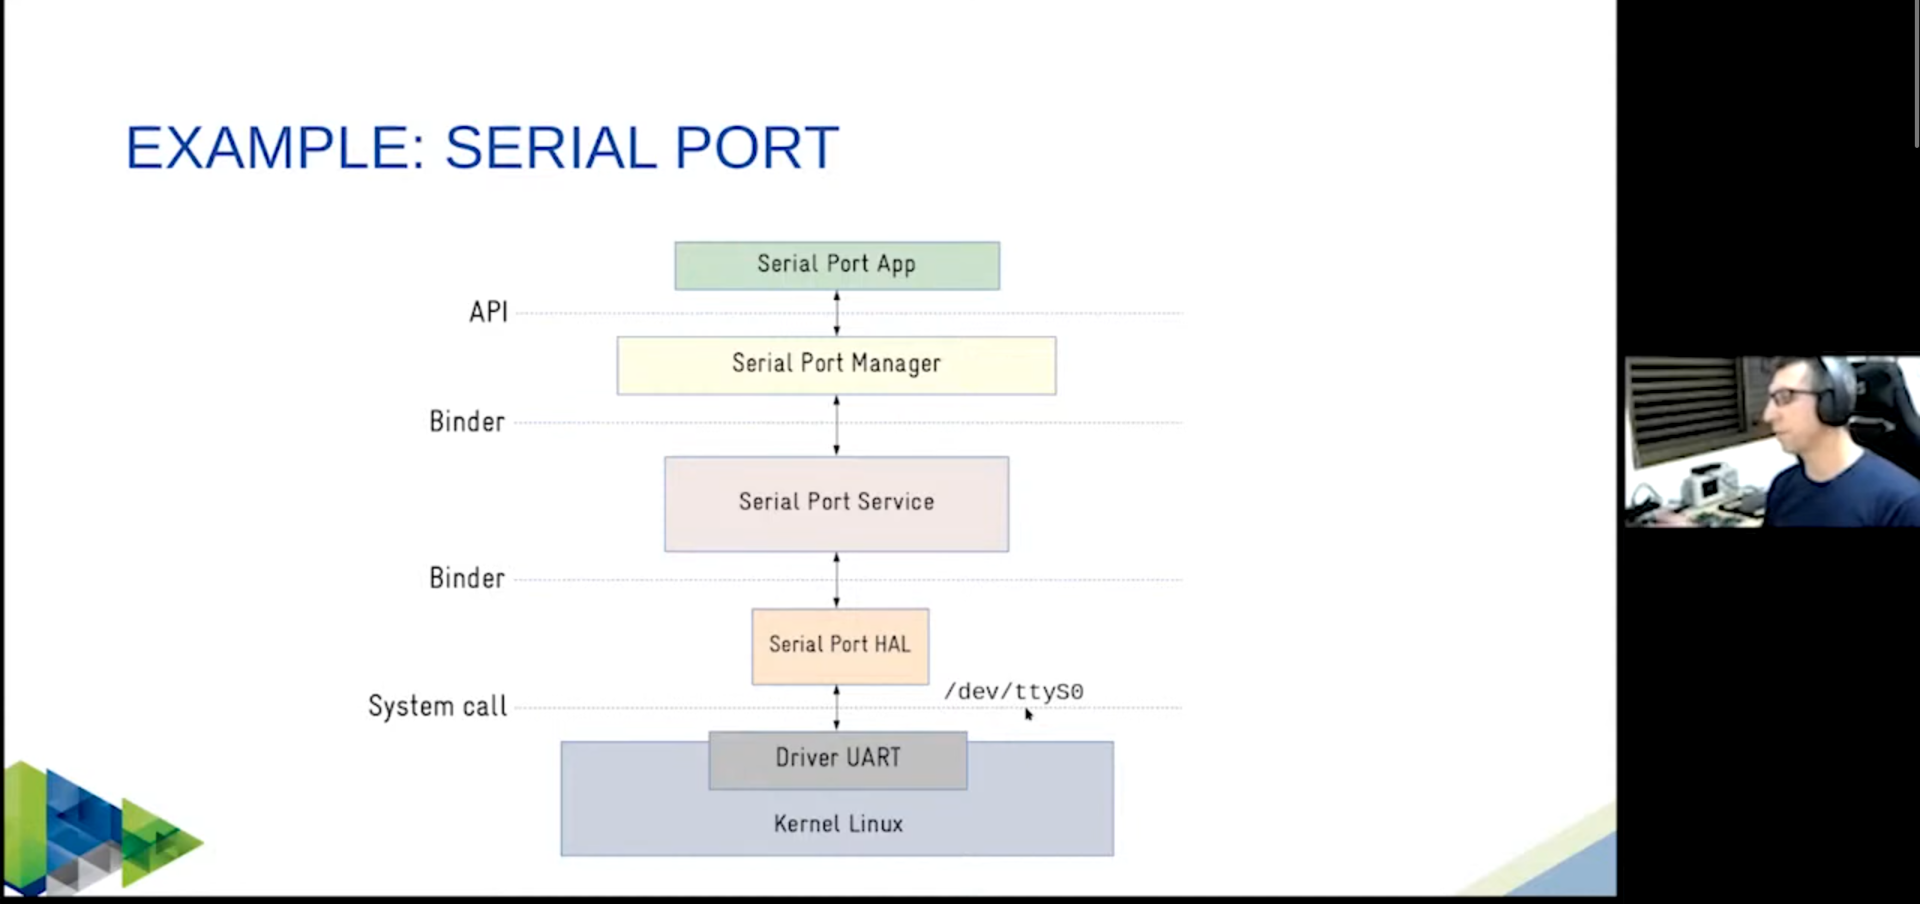

## Android HAL

The main idea is to decouple the system services (more on it later) from the interfaces exposed by the Linux kernel. So if a kernel interface changes, you just have to replace the HAL, and the system services will continue working. Most HALs are essentially services running as a separate process that exposes an interface (declared in a language called HIDL) consumed via **Binder**. There are HAL definitions and implementations for most supported hardware devices in Android, such as displays, cameras, audio, sensors, etc.

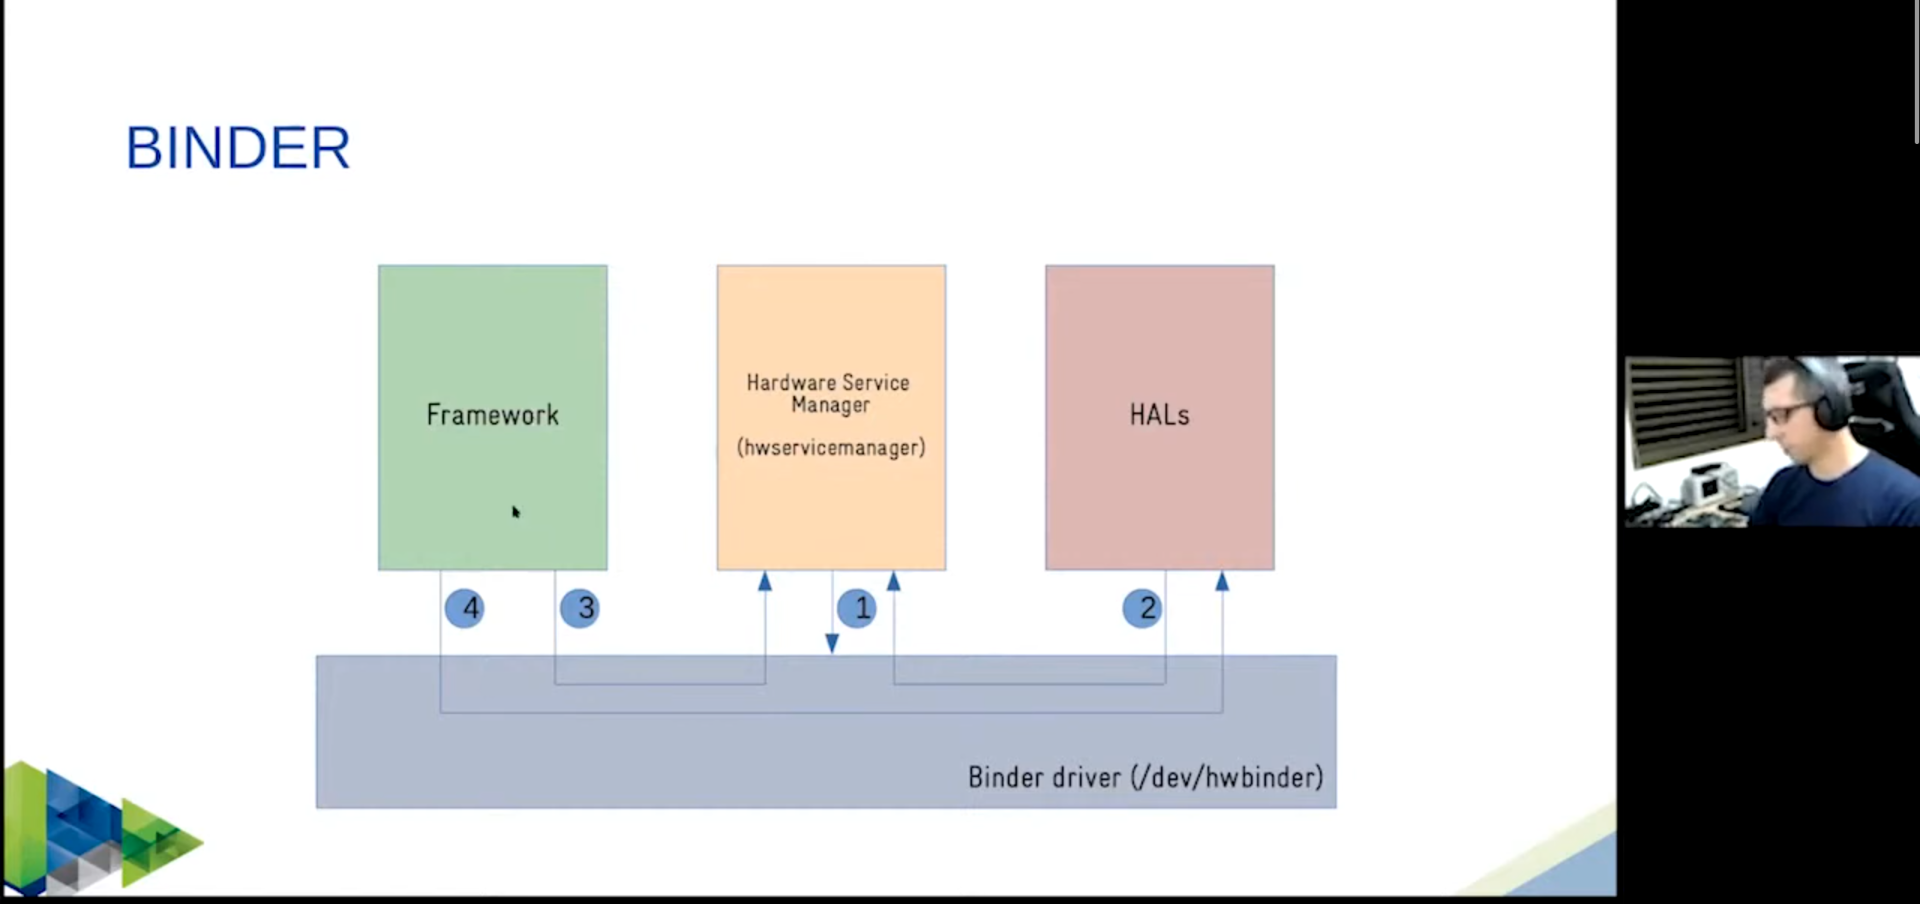

To completely understand the picture above, we have to talk about the **Android framework** and the **system services**.

## Android Framework and System Services

The **Android framework** is where all Java (and now Kotlin) code resides. It contains the system services and the APIs exposed to applications.

The system services, in particular, are an essential part of the Android operating system. They are essentially objects that expose an interface (via **Binder**) to be consumed by other system services and applications (via API).

On an Android terminal, you can list the system services with the command below:

```bash
# service list
Found 184 services:
0	DockObserver: []
1	SurfaceFlinger: [android.ui.ISurfaceComposer]
2	accessibility: [android.view.accessibility.IAccessibilityManager]
3	account: [android.accounts.IAccountManager]
4	activity: [android.app.IActivityManager]
5	activity_task: [android.app.IActivityTaskManager]
6	adb: [android.debug.IAdbManager]
7	alarm: [android.app.IAlarmManager]
8	android.hardware.identity.IIdentityCredentialStore/default: [android.hardware.identity.IIdentityCredentialStore]
9	android.hardware.light.ILights/default: [android.hardware.light.ILights]
10	android.hardware.power.IPower/default: [android.hardware.power.IPower]
11	android.hardware.rebootescrow.IRebootEscrow/default: [android.hardware.rebootescrow.IRebootEscrow]
12	android.hardware.vibrator.IVibrator/default: [android.hardware.vibrator.IVibrator]
13	android.security.identity: [android.security.identity.ICredentialStoreFactory]
14	android.security.keystore: [android.security.keystore.IKeystoreService]
15	android.service.gatekeeper.IGateKeeperService: [android.service.gatekeeper.IGateKeeperService]
16	app_binding: []
17	app_integrity: [android.content.integrity.IAppIntegrityManager]
18	appops: [com.android.internal.app.IAppOpsService]
19	appwidget: [com.android.internal.appwidget.IAppWidgetService]
20	audio: [android.media.IAudioService]
21	auth: [android.hardware.biometrics.IAuthService]
```

## Android Application Interaction with Sensors

When developing an Android application to interact with a sensor, the process is as follows:

1. **Application Call**: The application invokes methods from the Android API (e.g., `SensorManager`) to request sensor data.
2. **API to System Service**: The API sends a message via Binder to a system service (e.g., `SensorService`), which manages sensor access.
3. **Permission Check**: The system service verifies if the application has the necessary permissions. If not, it returns an exception. If granted, the service communicates with the HAL (e.g., `Sensors HAL`).
4. **Sensor Data Retrieval**: The HAL interacts with the sensor, typically using kernel IIO drivers, to collect the data and sends it back to the system service.
5. **Data to Application**: The system service then returns the sensor data to the application.

This interaction exemplifies how Android differs from a typical Linux system due to its layered architecture, where components communicate via IPC/RPC (Inter-Process Communication / Remote Procedure Call).

![](https://sergioprado.blog/images/20210404-android-service.png)

## Android Applications

- Android apps are built using Java or Kotlin, packaged in `.apk` files, and typically contain:
    - **Activities**: UI components for interaction.
    - **Services**: Background tasks that run independently.
    - **Broadcast Receivers**: Handle system or app events.
    - **Content Providers**: Share data between apps.
  
  Components can be reused and communicate using **Intents**, a mechanism that facilitates interaction between app components.

## Is Android a Linux Distribution?

- Android's architecture and development process diverge significantly from traditional Linux distributions. While Android uses the Linux kernel, it does not follow the same standards or share the common components of GNU/Linux.
- **Android as a Linux Distribution**: If a Linux distribution is defined by using the Linux kernel, Android could be considered one. However, it lacks the GNU project's common components, so it’s not a typical Linux distribution.

## Challenges & Evolution

- One significant challenge for Android is software updates. Unlike Apple, which controls both hardware and software, Google does not control the devices made by manufacturers like Samsung or Xiaomi.
- **Google’s Efforts**: Through projects like **Project Treble**, **Generic System Images (GSI)**, and **Generic Kernel Image (GKI)**, Google is aiming to improve control over updates and enhance Android’s modular architecture.

